# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [30]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


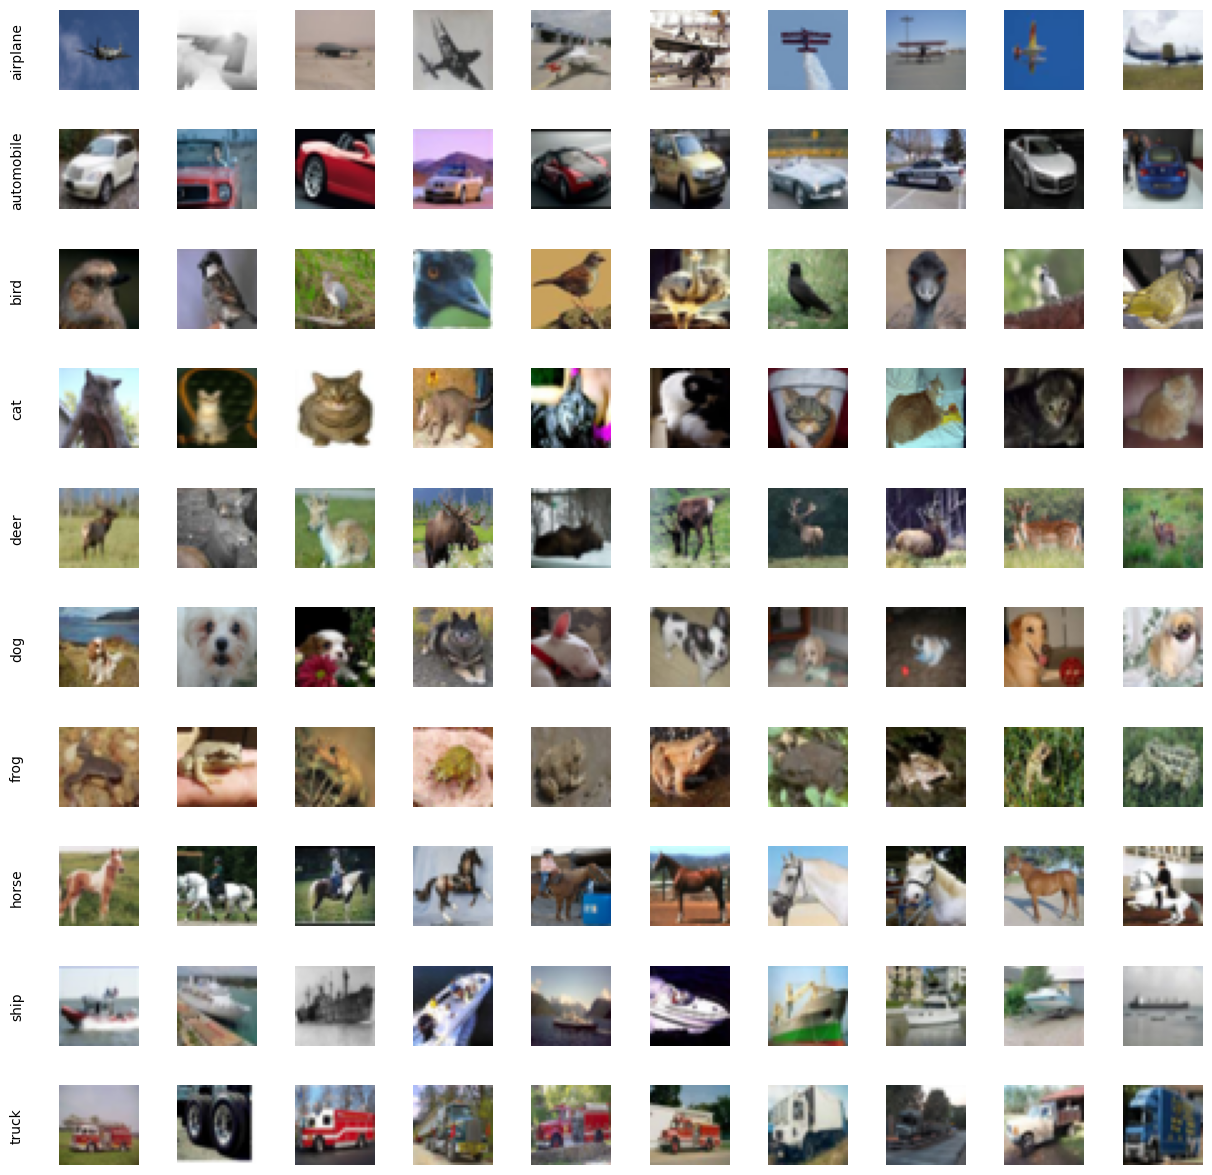

In [31]:

# Your code here :
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Initialize a dictionary to store 10 random samples for each class
samples_per_class = {i: [] for i in range(10)}

# Randomly select 10 samples for each class
for class_id in range(10):
    idx = np.where(y_train == class_id)[0]
    random_samples = np.random.choice(idx, 10, replace=False)
    samples_per_class[class_id] = X_train[random_samples]

# Create a 10x10 plot
fig, axes = plt.subplots(10, 10, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)

for class_id in range(10):
    for sample_id in range(10):
        ax = axes[class_id, sample_id]
        ax.imshow(samples_per_class[class_id][sample_id])
        ax.axis('off')  # Turn off the axis
        if sample_id == 0:  # Add class label to the leftmost image
            ax.text(-20, 16, class_names[class_id], rotation=90, verticalalignment='center')

# Show the plot
plt.show()

In [32]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [33]:
from keras.backend import clear_session
clear_session()

In [50]:
from tensorflow import keras
from tensorflow.keras import layers
input_shape = (32,32,3)
model = keras.Sequential(
     [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(100, activation="relu"),
        layers.Dense(10, activation="softmax")


     ]
)
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [51]:
# Your code here :
batch_size = 512
epochs = 2
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/2
88/88 ━━━━━━━━━━━━━━━━━━━━ 24s 258ms/step - accuracy: 0.1001 - loss: 1174.5876 - val_accuracy: 0.0958 - val_loss: 2.3687
Epoch 2/2
88/88 ━━━━━━━━━━━━━━━━━━━━ 19s 221ms/step - accuracy: 0.0986 - loss: 2.3039 - val_accuracy: 0.0960 - val_loss: 2.3434


*   Plot the cross entropy loss curve and the accuracy curve

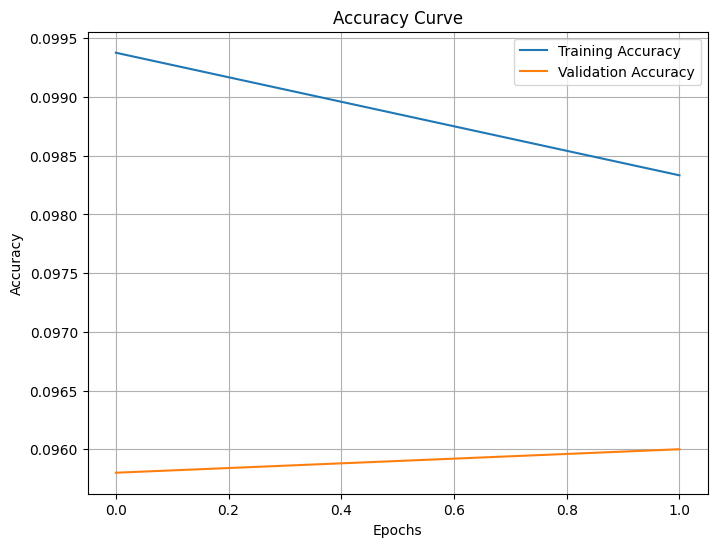

In [52]:
# Your code here :
# Plot the accuracy curve
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [53]:
from keras.backend import clear_session
clear_session()

In [54]:
# Your code here :
model2 = keras.Sequential(
     [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax")
     ]
)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [57]:
# Your code here :
model2.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
history2 = model2.fit(x_train, y_train, batch_size=512, epochs=2, validation_split=0.1)

Epoch 1/2
88/88 ━━━━━━━━━━━━━━━━━━━━ 73s 820ms/step - accuracy: 0.1020 - loss: 2.3026 - val_accuracy: 0.0976 - val_loss: 2.3026
Epoch 2/2
88/88 ━━━━━━━━━━━━━━━━━━━━ 62s 697ms/step - accuracy: 0.1009 - loss: 2.3026 - val_accuracy: 0.0976 - val_loss: 2.3026


*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

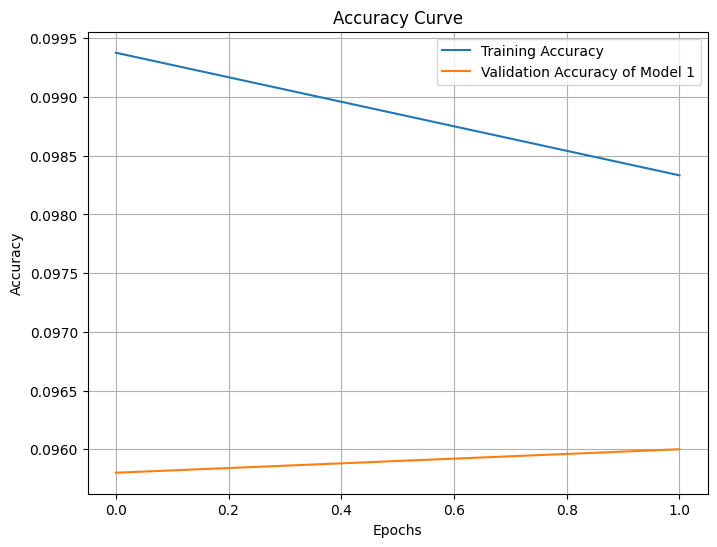

KeyError: 'val_accuracy'

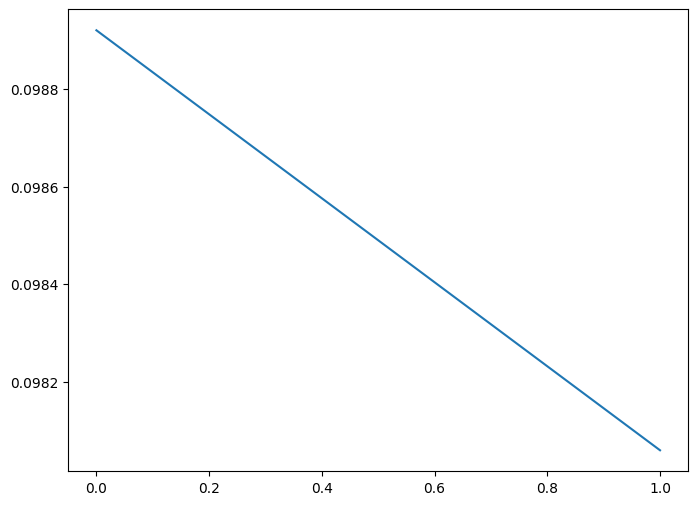

In [56]:
# Your code here :
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy of Model 1')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy of Model 2')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


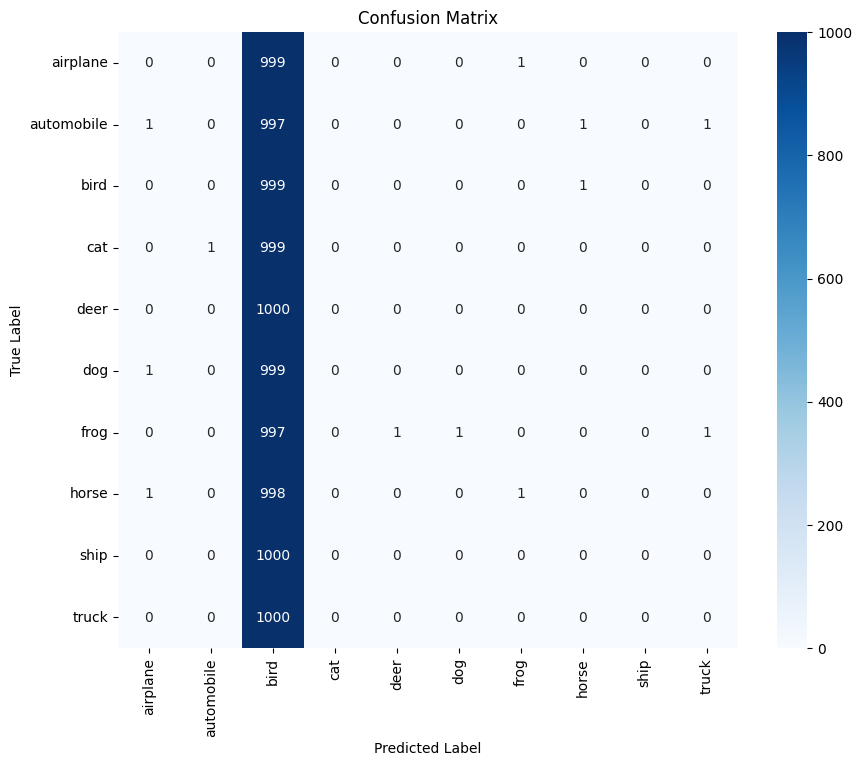

In [61]:
# Your code here :
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test)

# Convert predictions from probabilities to class labels (0-9)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Step 2: Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Step 3: Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [62]:
# Your code here :
score = model.evaluate(x_test, y_test, verbose=0)

# Print test loss and accuracy
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 2.302676200866699
Test accuracy: 0.09989999979734421


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [15]:
from keras.backend import clear_session
clear_session()

In [69]:
import tensorflow as tf


# Resize the CIFAR-10 images from 32x32 to 64x64
x_train_resized = tf.image.resize(x_train, (64, 64))
x_test_resized = tf.image.resize(x_test, (64, 64))

In [70]:
# Your code here :
input_shape = (64,64,3)

model3 = keras.Sequential(
     [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(256, kernel_size=(3, 3), activation="relu"),
        
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax")
     ]
)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [72]:
# Your code here :
model3.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
history3 = model3.fit(x_train_resized, y_train, batch_size=512, epochs=10, validation_split=0.1)

Epoch 1/10
 5/88 ━━━━━━━━━━━━━━━━━━━━ 1:21:08 59s/step - accuracy: 0.0979 - loss: nan 

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:

By using an activiation function, non-linearity is introduced in a neural network. It transforms the specific weights of a neuron into a specific range according to the specific characteristic of an activation function. Activation functions are essential to  help a network to decide which neurons to activate and which ones to shut down.

_

2 - Key Differences between sigmoid and softmax:

he sigmoid function squashes values between 0 and 1, while ReLU (Rectified Linear Unit) outputs values between 0 and infinity, with all negative inputs set to zero

_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:
categorical crossentropy calculates the difference between the predictions of a  one-hot encoding and the overall predicted distribution; so the output of the softmax, for exxample. 
the binary crossentropy on the other hand, Computes the loss between the true label (0 or 1) and the predicted probability for only one output neuron.
_
